<h1 style='font-size: 45px; color: crimson; font-family: Dubai; font-weight: 600'>Impact on Crop Yield: Analyze the relationship between weed coverage reduction and crop yield for both groups.</h1>

In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries loaded Succesfully')

Libraries loaded Succesfully


In [41]:
data = pd.read_csv('../Datasets/herbicide_data.csv')
data.head()

,Herbicide_Type,Reduction (%),Crop_Yield (kg/plot),Soil_Type,Weather_Conditions,Treatment_Duration (days)
0,New,65.553988,257.278544,Loamy,Dry,13.955628
1,Old,44.375456,213.448793,Loamy,Rainy,14.091753
2,Old,30.769262,252.163982,Sandy,Dry,8.138781
3,Old,40.237435,205.429490,Loamy,Rainy,11.910558
4,New,84.196834,295.588641,Clay,Dry,7.716332


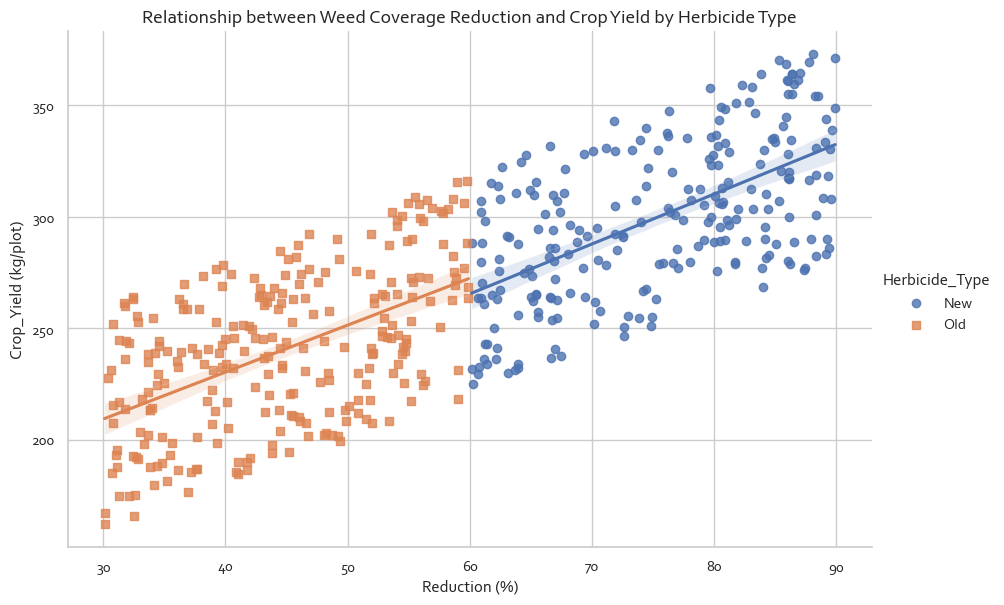

In [19]:
# Scatter plot with regression lines for each group
sns.lmplot(data=data, x='Reduction (%)', y='Crop_Yield (kg/plot)', hue='Herbicide_Type', 
           height=6, aspect=1.5,markers=["o", "s"],ci=95)
plt.title("Relationship between Weed Coverage Reduction and Crop Yield by Herbicide Type")
plt.show()

<h2 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Correlation Analysis</h2>

Check the correlation between weed coverage reduction and crop yield for each group.

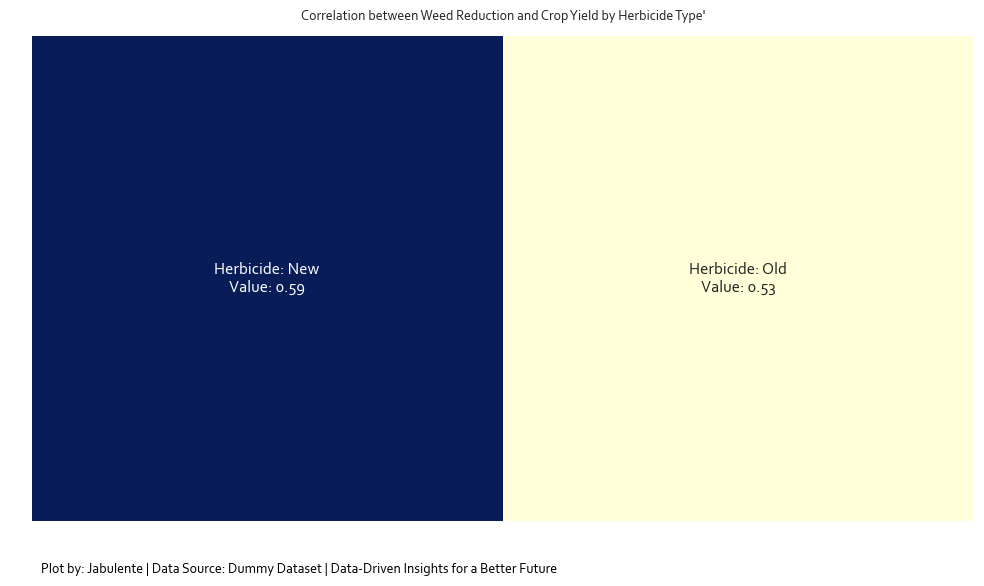

In [20]:
sns.set_theme(style="whitegrid", font="Corbel", rc={"font.size": 12, "axes.titlesize": 14})

grouped = data.groupby('Herbicide_Type')
correlations = {}

for herbicide, group in grouped:
    correlation = group['Reduction (%)'].corr(group['Crop_Yield (kg/plot)'])
    correlations[herbicide] = correlation

correlation_matrix = pd.DataFrame(np.array(list(correlations.values())).reshape(1, -1), columns=correlations.keys())

annotations = correlation_matrix.astype(str)
for row in annotations.index:
    for col in annotations.columns:
        annotations.loc[row, col] = f"Herbicide: {col}\nValue: {correlation_matrix.loc[row, col]:.2f}"

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=annotations.values, fmt="", cmap="YlGnBu", cbar=False,linewidths=0.002 )
plt.title("Correlation between Weed Reduction and Crop Yield by Herbicide Type'", fontsize=10, pad=12)
plt.xlabel(" ")
plt.ylabel(" ")

text = "Plot by: Jabulente | Data Source: Dummy Dataset | Data-Driven Insights for a Better Future "
plt.text(0.01, -0.1, text, ha='left', va='center', fontsize=10, color='black', transform=plt.gca().transAxes)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('../Results/Figures/AB1020000000001.png', dpi=900)
plt.show()

The correlation coefficients of 0.59 for the new herbicide and 0.53 for the old herbicide indicate a moderate positive relationship between **weed reduction** and **crop yield** for both groups. For the new herbicide, the correlation of 0.59 suggests a stronger positive relationship, meaning that as weed coverage decreases, crop yield tends to increase, but the effect is not extremely strong. The old herbicide, with a correlation of 0.53, shows a slightly weaker, yet still positive, relationship between weed reduction and crop yield. While both herbicides appear to have a beneficial impact on crop yield through improved weed control, the new herbicide has a marginally stronger association, implying it may be slightly more effective in promoting better crop yields as weed coverage is reduced.

<h2 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Encoding Categorical Variable</h2>

In [21]:
new_df = data.copy()
def labelEncoder(df):
    from sklearn.preprocessing import LabelEncoder
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df_encoded = df[column] = le.fit_transform(df[column])
    return print("Categorical Variables Encoded successfully✔")

dxd = data.copy()
categorical_columns = dxd.select_dtypes(include=['object']).columns
dxd = pd.get_dummies(dxd, columns=categorical_columns, drop_first=True)

labelEncoder(new_df)

Categorical Variables Encoded successfully✔


In [22]:
dxd.head()

,Reduction (%),Crop_Yield (kg/plot),Treatment_Duration (days),Herbicide_Type_Old,Soil_Type_Loamy,Soil_Type_Sandy,Weather_Conditions_Moderate,Weather_Conditions_Rainy
0,65.553988,257.278544,13.955628,False,True,False,False,False
1,44.375456,213.448793,14.091753,True,True,False,False,True
2,30.769262,252.163982,8.138781,True,False,True,False,False
3,40.237435,205.429490,11.910558,True,True,False,False,True
4,84.196834,295.588641,7.716332,False,False,False,False,False


In [23]:
dxd.columns.tolist()

['Reduction (%)',
 'Crop_Yield (kg/plot)',
 'Treatment_Duration (days)',
 'Herbicide_Type_Old',
 'Soil_Type_Loamy',
 'Soil_Type_Sandy',
 'Weather_Conditions_Moderate',
 'Weather_Conditions_Rainy']

In [ ]:
# Step 3: Compute the correlation matrix

In [24]:
correlation_matrix = dxd.corr()
correlation_matrix

,Reduction (%),Crop_Yield (kg/plot),Treatment_Duration (days),Herbicide_Type_Old,Soil_Type_Loamy,Soil_Type_Sandy,Weather_Conditions_Moderate,Weather_Conditions_Rainy
Reduction (%),1.000000,0.779605,-0.040704,-0.863712,-0.037882,0.083251,0.047845,-0.107896
Crop_Yield (kg/plot),0.779605,1.000000,-0.027652,-0.653593,-0.039078,0.055431,0.063851,-0.101996
Treatment_Duration (days),-0.040704,-0.027652,1.000000,0.030970,-0.007905,0.035731,0.084659,0.021251
Herbicide_Type_Old,-0.863712,-0.653593,0.030970,1.000000,0.036604,-0.106301,-0.062851,0.044854
Soil_Type_Loamy,-0.037882,-0.039078,-0.007905,0.036604,1.000000,-0.665815,-0.020187,0.010776
Soil_Type_Sandy,0.083251,0.055431,0.035731,-0.106301,-0.665815,1.000000,-0.035670,0.102460
Weather_Conditions_Moderate,0.047845,0.063851,0.084659,-0.062851,-0.020187,-0.035670,1.000000,-0.438756
Weather_Conditions_Rainy,-0.107896,-0.101996,0.021251,0.044854,0.010776,0.102460,-0.438756,1.000000


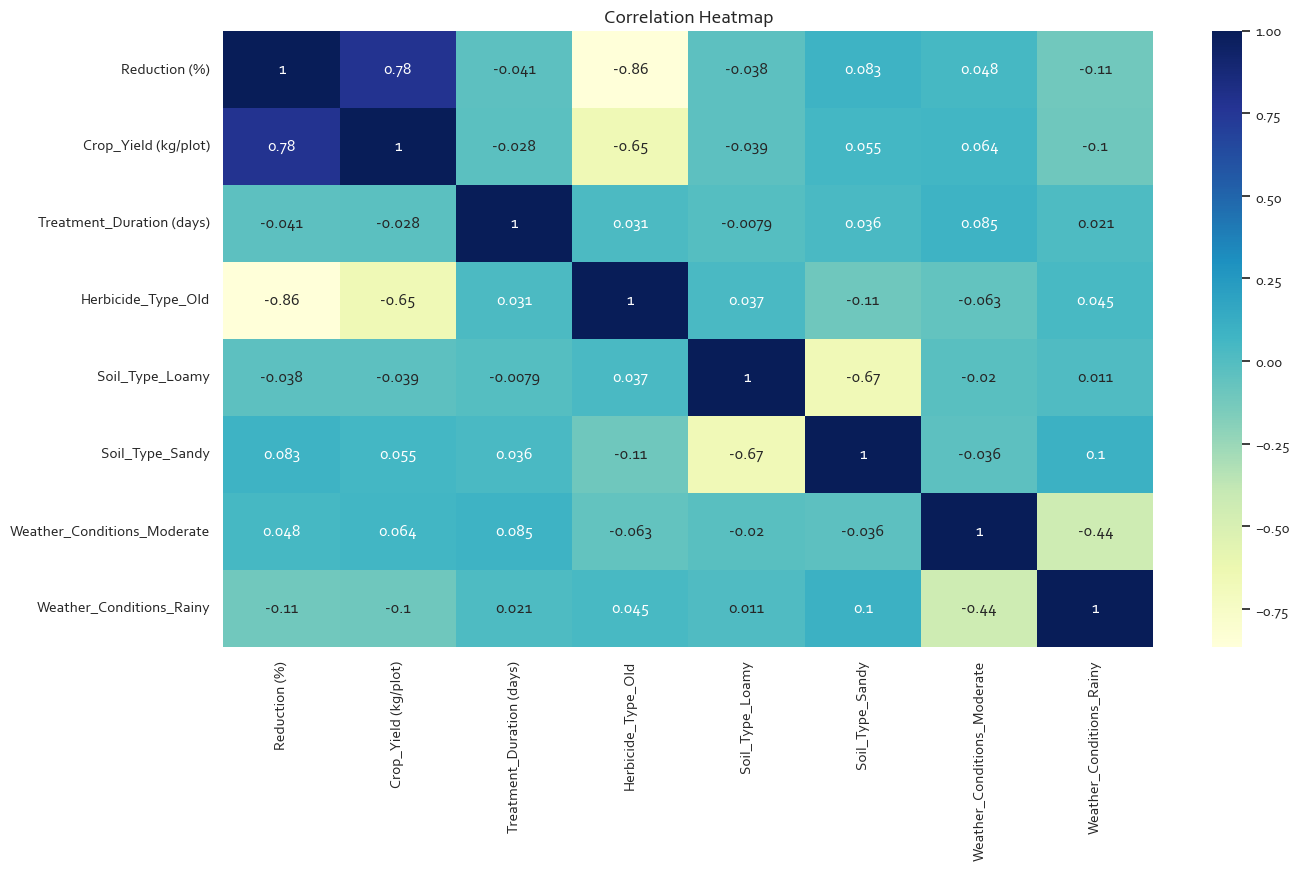

In [25]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.002,  cbar=True)
plt.title('Correlation Heatmap')
plt.savefig('../Results/Figures/AB1020000000002.png', dpi=900)
plt.show()

<h2 style='font-size: 45px; color: crimson; font-family: Dubai; font-weight: 600'>Linear Regression Analysis</h2>

Use linear regression to quantify the relationship between weed coverage reduction and crop yield for each group.

In [26]:
from scipy.stats import linregress

# Create an empty list to store regression results
regression_results = []

# Assuming 'data' is the DataFrame containing the dataset
grouped = data.groupby('Herbicide_Type')

# Linear regression for each group
for herbicide, group in grouped:
    slope, intercept, r_value, p_value, std_err = linregress(
        group['Reduction (%)'], 
        group['Crop_Yield (kg/plot)']
    )
    
    # Append the results to the list
    regression_results.append({
        'Herbicide_Type': herbicide,
        'Slope': slope,
        'Intercept': intercept,
        'R-squared': r_value**2,
        'P-value': p_value,
        'Std Error': std_err
    })

# Create a DataFrame from the results
regression_df = pd.DataFrame(regression_results)
regression_df

,Herbicide_Type,Slope,Intercept,R-squared,P-value,Std Error
0,New,2.234062,131.372310,0.353963,1.821055e-24,0.195230
1,Old,2.100855,146.400758,0.284064,2.075248e-20,0.208046


- The results of the linear regression analysis show that both the new and old herbicides have a positive relationship between **weed reduction** and **crop yield**, as indicated by the positive slopes for both groups (`2.23` for the new herbicide and `2.10` for the old herbicide). This means that for each unit increase in weed reduction, crop yield increases by approximately 2.23 kg/plot for the new herbicide and 2.10 kg/plot for the old herbicide.

- The **intercept values** (131.37 for the new herbicide and 146.40 for the old herbicide) represent the estimated crop yield when there is no reduction in weed coverage, with the old herbicide yielding higher crop yields at baseline. 

- The **p-values** (1.82e-24 for the new herbicide and 2.08e-20 for the old herbicide) are extremely small, indicating that the relationships between weed reduction and crop yield for both herbicides are statistically significant. 

- Finally, the **standard errors** (0.20 for the new herbicide and 0.21 for the old herbicide) show that the regression coefficients are estimated with a relatively small margin of error, though the new herbicide’s slope has a slightly more precise estimate.

In [27]:
import statsmodels.api as sm
Predictors = new_df[['Reduction (%)']] 
Target = new_df['Crop_Yield (kg/plot)']

# Fit the model
model = sm.OLS(Target, Predictors).fit()

print(model.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Crop_Yield (kg/plot)   R-squared (uncentered):                   0.964
Model:                              OLS   Adj. R-squared (uncentered):              0.964
Method:                   Least Squares   F-statistic:                          1.338e+04
Date:                  Fri, 03 Jan 2025   Prob (F-statistic):                        0.00
Time:                          02:15:57   Log-Likelihood:                         -2682.2
No. Observations:                   500   AIC:                                      5366.
Df Residuals:                       499   BIC:                                      5371.
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------

*The regression results indicate that **weed reduction** has a significant positive impact on **crop yield**, as shown by the coefficient of 4.32. This means that for every 1% increase in weed reduction, crop yield increases by approximately 4.32 units, holding other factors constant.*

<h2 style='font-size: 35px; color: crimson; font-family: Dubai; font-weight: 600'>Conclusion Summary</h2>

A strong positive correlation (**0.78**) between weed reduction and crop yield underscores the critical role of effective weed management in enhancing agricultural productivity. Additionally, the new herbicide showed better synergy with crop yield outcomes than the old one, as highlighted by the linear regression results: the new herbicide had a higher R-squared value (**0.35**) compared to the old herbicide (**0.28**), explaining more variance in crop yield improvements. 

Environmental factors such as soil type and weather conditions had limited but noteworthy influences. For instance, loamy and sandy soils had inverse relationships, and rainy conditions slightly hindered weed reduction. However, these effects were secondary to the herbicide's efficacy.